**This is a demonstration Notebook to showcase current progress**

In [1]:
# Change the working directory to the project root
import os
import io
import sys
project_root = "/home/vlapan/Documents/Masterarbeit/Relational"
os.chdir(project_root)
!pwd

/home/vlapan/Documents/Masterarbeit/Relational


### Here you can see all the intial test cases used in this project, which are used for evaluation and the calculation of the metrics.

In [5]:
from Evaluation.test_evaluation import evaluation_pipeline
from Evaluation.evaluation import test_cases

RUNS=3
queries= [i for i, _ in test_cases]
answers= [i for _ , i in test_cases]
test_cases


[('∃id ∃name ∃patients_pd (doctors(id, name, patients_pd) ∧ patients_pd < 12)',
  {(1, 'Peter', 'ten'), (2, 'Giovanni', '11')}),
 ("∃id ∃patients_pd (doctors(id, 'Peter', patients_pd) ∧ patients_pd < 12)",
  {(1, 'Peter', 'ten')}),
 ("∃id ∃shares ∃name (shareowner1row(id, name, shares) ∧ animalowner1row(id, _, 'dog'))",
  {(1, 'Pierre', 20, 1, 'bill', 'chien')}),
 ("∃id ∃shares ∃name (shareowner(id, name, shares) ∧ animalowner(id, _, 'dog'))",
  {(1, 'Pierre', 20, 1, 'bill', 'chien'),
   (3, 'Diego', 15, 3, 'chris', 'dog'),
   (4, 'Marcel', 11, 4, 'juan', 'perro')}),
 ("∃id ∃shares ∃name(shareowner(id, name, shares) ∧ ¬animalowner(id, _, 'dog'))",
  {(2, 'Vladi', 10, 2, 'diego', 'chat')}),
 ('∃x ∃y ∃z (children_table(x, y) ∧ fathers(x, z))',
  {(0, '4', 'zero', 'Gerhard'),
   (1, '1', 'one', 'Joachim'),
   (2, 'many', 'two', 'Dieter')}),
 ('∃id (children_table(id, ) ∧ fathers(id, _) ∧ mothers(id, _) )',
  {(1, '1', 'one', 'Joachim', 1, 'Julia'),
   (2, 'many', 'two', 'Dieter', 2, 'Petr

In [6]:
from Main.combined_pipeline import combined_pipeline
from Evaluation.test_evaluation import evaluate_results
index=0
initial_sql_query_join, semantic_list_join, result_join, initial_sql_query_where, semantic_list_where, result_where, result, tmp_metadata =combined_pipeline(query=queries[index], evaluation=True)

Error: Tables do not have the same length.
Error: Tables do not have the same length.
Error: Tables do not have the same length.
Error: Tables do not have the same length.
The relevant tables are ['doctors']
The context is The name of the table is doctors

Columns in the table doctors (in correct order):
id
name
patients_pd

Schema Information:
[('id', 'NO', 'integer', 'PRIMARY KEY'), ('name', 'YES', 'text', None), ('patients_pd', 'YES', 'text', None)]

The query is ∃id ∃name ∃patients_pd (doctors(id, name, patients_pd) ∧ patients_pd < 12)
The SQL query is: SELECT *
FROM doctors
WHERE doctors.patients_pd < 12;
--------------------------------------
The 
”SELECT *
FROM doctors
WHERE doctors.patients_pd < 12;
 has a WHERE clause.
<bound method TokenList.get_name of <Where 'WHERE ...' at 0x70C83CF5D150>>
The final answer to the query is [('fourty',), ('44',), ('ten',), ('150',), ('11',)]
The phrase is:
 is smaller than
. 
temp_string: 12
temp_list: [('fourty',), ('44',), ('ten',), ('150',

In [7]:
print(f"The result is {result}")
print(f"The answer is supposed to be {answers[index]}")
acc, prec, rec, f1= evaluate_results(answers[index],result)
print(f"The accuracy is {acc}")
print(f"The precision is {prec}")
print(f"The recall is {rec}")
print(f"The f1 score is {f1}")

The result is [(3, 'Hans', 'fourty'), (1, 'Peter', 'ten'), (2, 'Giovanni', '11')]
The answer is supposed to be {(2, 'Giovanni', '11'), (1, 'Peter', 'ten')}
The accuracy is 0.6666666666666666
The precision is 0.6666666666666666
The recall is 1.0
The f1 score is 0.8


Figure saved to saved_plots/average_metrics_gemini_1_5_translation.png


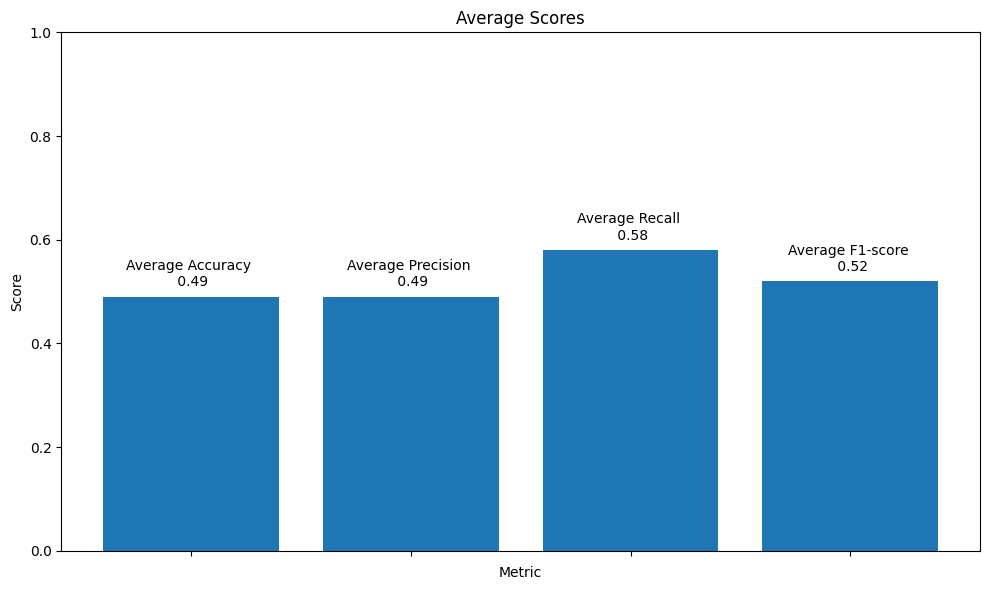

Figure saved to saved_plots/average_metrics_gemini_1_5_translation.png


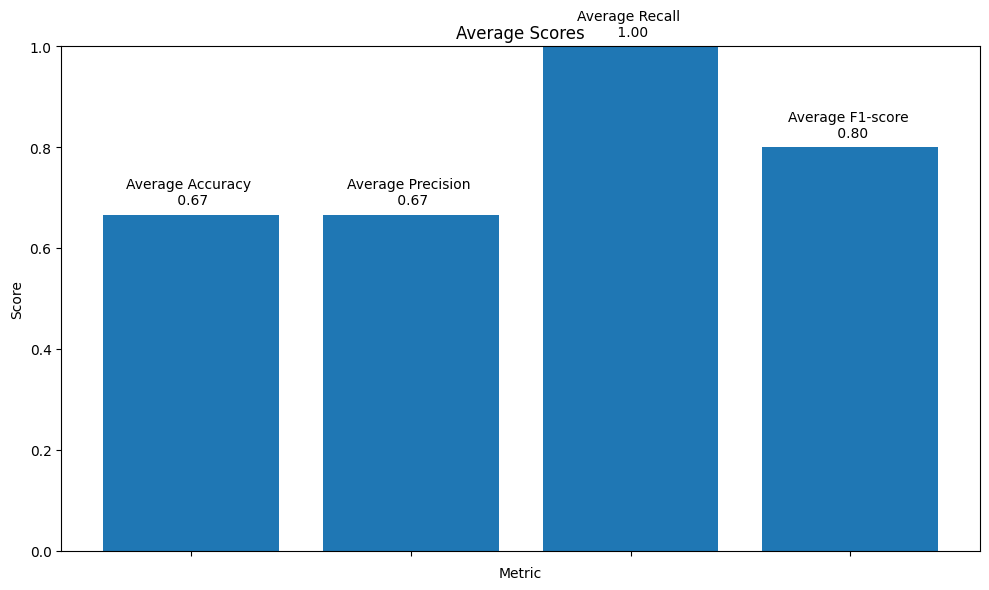

In [8]:
#Visualization of the metrics
from Visualization.visualization_average_metrics import visualize_results
visualize_results(acc, prec, rec, f1)

### Hard (meaning without semantic binding)

In [9]:
from Main.combined_pipeline import  hard_pipeline

hard_result, _ =hard_pipeline(query=queries[index])
print(f"The result is {hard_result}")
print(f"The answer is supposed to be {answers[index]}")
acc_hard, prec_hard, rec_hard, f1_hard= evaluate_results(answers[index],hard_result)
print(f"The accuracy is {acc_hard}")
print(f"The precision is {prec_hard}")
print(f"The recall is {rec_hard}")
print(f"The f1 score is {f1_hard}")

Error: Tables do not have the same length.
Error: Tables do not have the same length.
Error: Tables do not have the same length.
Error: Tables do not have the same length.
The relevant tables are ['doctors']
The context is The name of the table is doctors

Columns in the table doctors (in correct order):
id
name
patients_pd

Schema Information:
[('id', 'NO', 'integer', 'PRIMARY KEY'), ('name', 'YES', 'text', None), ('patients_pd', 'YES', 'text', None)]

The query is ∃id ∃name ∃patients_pd (doctors(id, name, patients_pd) ∧ patients_pd < 12)
The SQL query is: SELECT *
FROM doctors
WHERE doctors.patients_pd < 12;
The result is []
The answer is supposed to be {(2, 'Giovanni', '11'), (1, 'Peter', 'ten')}
The accuracy is 0.0
The precision is 0
The recall is 0.0
The f1 score is 0


Figure saved to saved_plots/average_metrics_gemini_1_5_translation.png


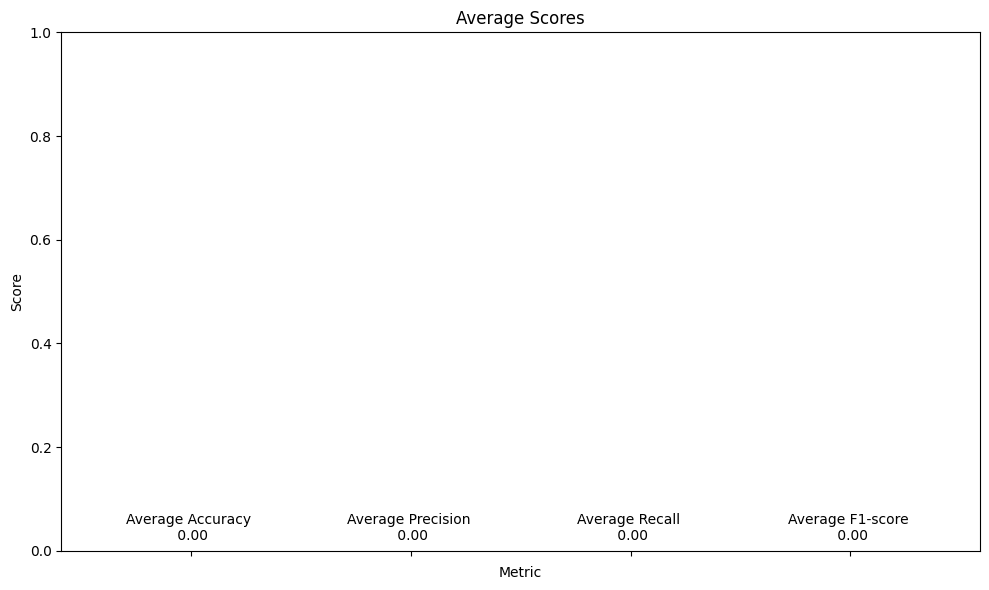

In [10]:
visualize_results(acc_hard, prec_hard, rec_hard, f1_hard)

**Why are all the metrics zero?**. This can be explained as this query tackles a WHERE clause. However, the numbers are partly represented as text. Because the initial query generation only takes the schmema level information into account, it generates a non-executable SQL query, which in turn returns a None output. which results in all the metrics being zero.

### Error Identification 
Additionally, there is the way to examinate at which stage of the process occured. Like to be investigated here

In [11]:
from Evaluation.test_evaluation import load_data
filepath = os.path.join(os.getcwd(), "temporary", "total_test")
loaded_dictionary = load_data(filepath)

In [12]:
from Evaluation.test_evaluation import comparison_logic

result_dic={
"initial_sql_query_join" : initial_sql_query_join,
"semantic_list_join" : semantic_list_join,
"result_join" : result_join,
"initial_sql_query_where" : initial_sql_query_where,
"semantic_list_where" : semantic_list_where,
"result_where" : result_where,
"output" : result, }
#Retrieve target instances from the loaded dictionary
target_value= queries[index]
target_instance = None
for i in loaded_dictionary:
    if i["calculus"]==target_value:
        target_instance = i
error_cnt_tmp = comparison_logic(result_dic, target_instance)

#Create a dictionary
tmp_dic= {}
tmp_dic[queries[index]]= error_cnt_tmp

print(f"The tmp_dic is {tmp_dic}")

The error count is {'initial_sql_query_join': 0, 'semantic_list_join': 0, 'result_join': 0, 'initial_sql_query_where': 0, 'semantic_list_where': 1, 'result_where': 0, 'correct_results': 0}
The tmp_dic is {'∃id ∃name ∃patients_pd (doctors(id, name, patients_pd) ∧ patients_pd < 12)': {'initial_sql_query_join': 0, 'semantic_list_join': 0, 'result_join': 0, 'initial_sql_query_where': 0, 'semantic_list_where': 1, 'result_where': 0, 'correct_results': 0}}


This is the visualization of the source of the error, which can be observed. The amount of errors at a particular sport are shown in the diagram. The decoding for what number corresponds to which step can be seen by the legend in the title. The seperation of tables into the queries is done according to the defined categorization.

Total plot saved to 'saved_plots' folder.


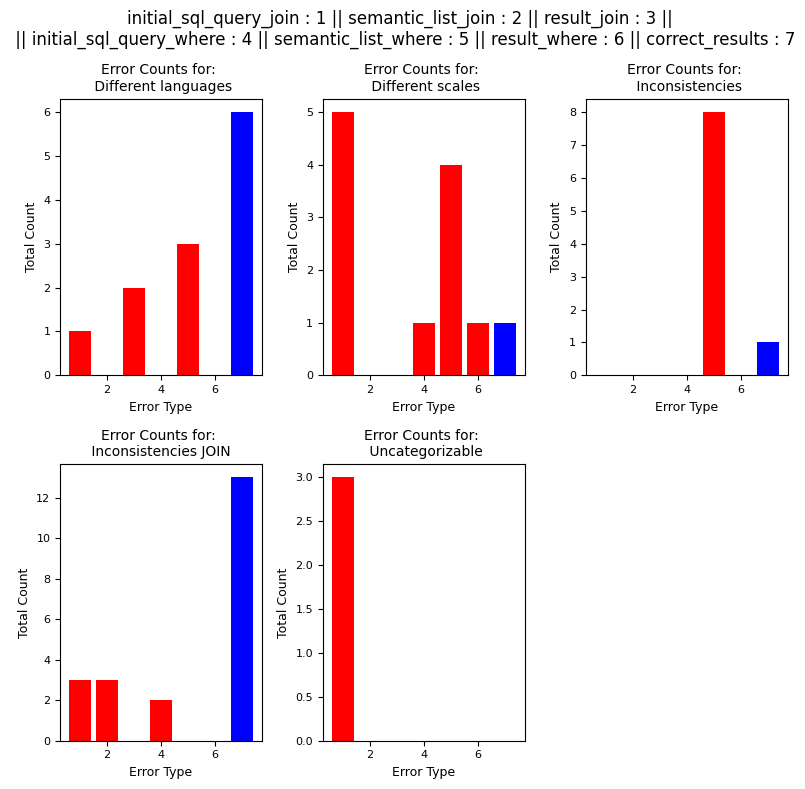

The total counter is:  57.0
Total plot saved to 'saved_plots' folder.


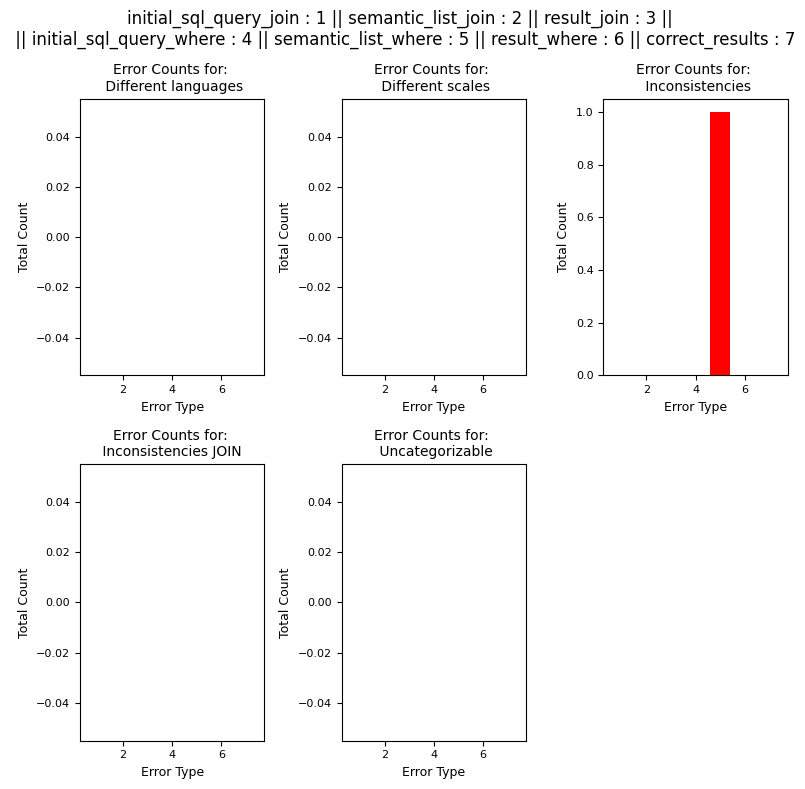

The total counter is:  1.0


In [13]:
from Visualization.test_visualization import visualize_errors_category
import json
path_categorization= os.path.join(os.getcwd(), "saved_json", "categorization")
with open(path_categorization, 'r') as f:
            categorization = json.load(f)

visualize_errors_category(tmp_dic, categorization)

Here, it can be seen that the Error occured at the semantic binding for the WHERE cluase. Note, that this only measures that an error occurs here, However, this evaluation doesn' state to which degree it deviates from the desired output, only if the response is not perfect, at which step the error occured first.

### Semantic binding comparison

In [14]:
from Evaluation.boolean_metrics import create_boolean, calculate_metrics, visualize_boolean_metrics
models = [ "gemini-1.5-flash"]
reasons = ["direct", "CoT"]

prompts=["Answer the following questions with True or False. Reason you thinking, especially considering the units, converting units to another and then answering the question.  \n '1000 thousand'  is greater than '500' \n '50'  is greater than '500' \n '1 million'  is greater than '500' \n 'one thousand'  is greater than '500' \n"]
true_responses=[[True, False, True, True]]

comparisons=[" > 500"]


results=create_boolean(prompts, true_responses, comparisons , write=False)

TypeError: create_boolean() missing 2 required positional arguments: 'models' and 'reasons'

/home/vlapan/Documents/Masterarbeit/Relational/Evaluation/boolean_metrics.py:219: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


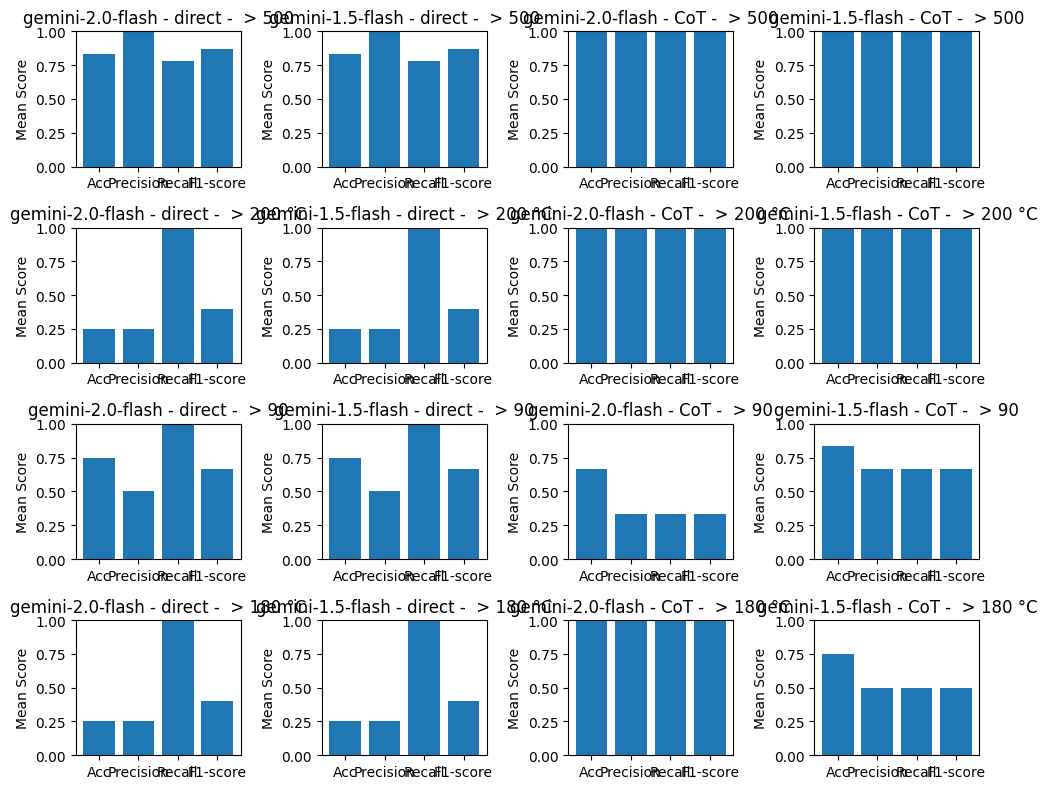

The mean values for direct are [0.25 0.25 1.   0.4 ]
The mean values for CoT are [0.875 0.75  0.75  0.75 ]
The mean values for gemini-2.0-flash are [0.71875    0.66666667 0.88888889 0.70833333]
The mean values for gemini-1.5-flash are [0.70833333 0.64583333 0.86805556 0.6875    ]


In [77]:
visualize_boolean_metrics()

### Remove duplicates

1. Write all functions to a big dictionary
2. At the end using remove_duplicate_rows (Checks whether one row can be achieved by the total dictionary and with combination with antoher row)


In [82]:
project_root = "/home/vlapan/Documents/Masterarbeit/Relational/Utilities"
os.chdir(project_root)
from Utilities.test_remove_duplicate_rows import test_remove_duplicate_rows
test_remove_duplicate_rows()

Test Case 1:
Expected: [(3, 'Diego', 15, 3, 'chris', 'dog'), (4, 'Marcel', 11, 4, 'juan', 'perro'), (1, 'Pierre', 20, 1, 'bill', 'chien')]
Got:      [(3, 'Diego', 15, 3, 'chris', 'dog'), (4, 'Marcel', 11, 4, 'juan', 'perro'), (1, 'Pierre', 20, 1, 'bill', 'chien')]

Test Case 2:
Expected: [(3, 'dog')]
Got:      [(3, 'dog')]

Test Case 3:
Expected: [(1, 'apple'), (2, 'banana'), (3, 'cherry')]
Got:      [(1, 'apple'), (2, 'banana'), (3, 'cherry')]

Test Case 4:
Expected: [(1, 'dog', 2), (3, 'cat', 4), (4, 'chat', 3)]
Got:      [(1, 'dog', 2), (3, 'cat', 4), (4, 'chat', 3)]

Test Case 5:
Expected: []
Got:      []

All test cases passed!
